# Week 4 Problem 3

If you are not using the `Assignments` tab on the course JupyterHub server to read this notebook, read [Activating the assignments tab](https://github.com/lcdm-uiuc/info490-sp17/blob/master/help/act_assign_tab.md).

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do **not** write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select _Kernel_, and restart the kernel and run all cells (_Restart & Run all_).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select _File_  → _Save and CheckPoint_)

5. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

-----

# Problem 4.3. Gradient Boosting Classifier

In [1]:
% matplotlib inline

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import ensemble
from sklearn.cross_validation import train_test_split
from sklearn.utils import check_random_state
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_absolute_error

from nose.tools import assert_equal, assert_is_instance, assert_is_not, assert_in
from numpy.testing import assert_array_equal, assert_array_almost_equal

import warnings
warnings.filterwarnings("ignore")

The data we are going to analyze is a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. I randomly picked 5 constituents as the 5 attributes, and the `Class` column indicates types of wines. The dataset is taken from: https://archive.ics.uci.edu/ml/datasets/Wine.

In [2]:
wines = pd.read_csv('data/wines.csv', 
                    names=['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                           'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
                           'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'],
                    usecols=['Class', 'Alcohol', 'Ash', 'Alcalinity of ash', 'Total phenols'])

In [3]:
print(wines.head())

   Class  Alcohol   Ash  Alcalinity of ash  Total phenols
0      1    14.23  2.43               15.6           2.80
1      1    13.20  2.14               11.2           2.65
2      1    13.16  2.67               18.6           2.80
3      1    14.37  2.50               16.8           3.85
4      1    13.24  2.87               21.0           2.80


## Split

This function is the same function from [Problem 3.1](https://github.com/UI-DataScience/info490-sp17/blob/master/Week3/assignments/w3p1.ipynb). You can copy-paste your answer. You won't need to write this again in the future.

In [4]:
def split(df, test_column, test_size, random_state):
    '''
    Uses sklearn.train_test_split to split "df" into a testing set and a test set.
    The "test_columns" lists the column that we are trying to predict.
    All columns in "df" except "test_columns" will be used for training.
    The "test_size" should be between 0.0 and 1.0 and represents the proportion of the
    dataset to include in the test split.
    The "random_state" parameter is used in sklearn.train_test_split.
    
    Parameters
    ----------
    df: A pandas.DataFrame
    test_columns: A list of strings
    test_size: A float
    random_state: A numpy.random.RandomState instance
    
    Returns
    -------
    A 4-tuple of pandas.DataFrames
    '''
    
    # YOUR CODE HERE
    df1 = df.drop(test_column, 1) # create new df without test_column
    # split into train and test sets
    (X_train, X_test, y_train, y_test) = train_test_split(df1, df[test_column], test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

Using `split` function, let's split our DataFrame 80:20 into training and tesing datasets.

In [5]:
X_train, X_test, y_train, y_test = split(
    df=wines,
    test_column=['Class'],
    test_size=0.2,
    random_state=check_random_state(0)
    )

## Gradient Boosting Classifier 
In the following code cell, write a function named `get_gbtc` that takes two hyperparameters: `n_estimators` and (optional) `max_depth` (Don't forget to include `random_state` as an argument as well), and returns a `sklearn.GradientBoostingClassifier` instance.

In [6]:
def get_gbtc(n_estimators, random_state, max_depth=1):
    '''
    A gradient boosting classifier with two adjustable hyperparameters:
    "n_estimators" and (optional) "max_depth". 
    Don't forget to include "random_state".
    Uses the default sklearn values for the remaining parameters.
    
    Parameters
    ----------
    n_estimators: An int
    random_state: A numpy.random.RandomState instance
    max_depth: An int, optional
    
    Returns
    -------
    An sklearn.ensemble.GradientBoostingClassifier
    '''
    
    # YOUR CODE HERE
    gbtc = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    
    return gbtc

In [7]:
t_gbtc = get_gbtc(200, check_random_state(2), max_depth=4)
assert_is_instance(t_gbtc, ensemble.GradientBoostingClassifier)
assert_equal(t_gbtc.n_estimators, 200)
assert_equal(t_gbtc.max_depth, 4)
assert_array_equal(t_gbtc.random_state.choice(100, 5), check_random_state(2).choice(100, 5))

## Fit and predict
In the following code cell, write a function named `get_pred` that makes classification predictions on a testing dataset.

In [8]:
def get_pred(gbtc, X_train, X_test, y_train):
    '''
    Fits the "gbtc" model on X_train and y_train.
    Makes predictions on X_test.
    
    Parameters
    ----------
    gbtc: A sklearn classifier instance.
    X_train: A pandas.DataFrame
    X_test: A pandas.DataFrame
    y_train: A pandas.DataFrame
    
    Returns
    -------
    A numpy array
    '''
    
    # YOUR CODE HERE
    # fit the gbtc with training
    gbtc.fit(X_train, y_train)
    # make prediction based on test
    y_pred = gbtc.predict(X_test)
    
    return y_pred

In [9]:
t_gbtc = get_gbtc(200, check_random_state(1), max_depth=4)

t_X_train = pd.DataFrame({
    'X0': np.arange(100), 
    'X1': np.arange(-25, 75),
    })

t_y_train = pd.DataFrame({
    'y': list(np.arange(10))*10
    })

t_X_test = pd.DataFrame({
    'X0': np.arange(100),
    'X1': np.arange(100),
    })

test_pred = get_pred(t_gbtc, t_X_train, t_X_test, t_y_train)
assert_array_equal(test_pred, 
                   np.array([0, 1, 7, 3, 4, 0, 1, 2, 0, 4, 0, 1, 2, 3, 4, 0, 1, 2, 8, 4, 5, 1, 2,
                             8, 4, 5, 1, 7, 1, 4, 5, 1, 2, 3, 4, 5, 6, 7, 8, 2, 5, 6, 7, 3, 4, 5,
                             6, 7, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 9, 0, 6, 7, 3, 4, 0, 1, 7, 3,
                             4, 5, 1, 7, 8, 4, 5, 6, 7, 8, 9, 0, 1, 9, 3, 9, 5, 6, 7, 8, 9, 0, 1,
                             9, 9, 4, 5, 6, 7, 8, 9]))

y_pred = get_pred(t_gbtc, X_train, X_test, y_train)
assert_array_equal(y_pred, np.array([1, 3, 2, 1, 1, 2, 1, 2, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 1, 1,
                                     2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1]))

## Find the best hyperparameter
Use [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to write a function named `get_best_param` that takes `X_train`, `y_train`, `n_estimators`, `random_state`, and a range of possible `max_depth`. The function does a grid search on `max_depth`, and returns a `max_depth` value that optimizes the predicition result.

In [10]:
def get_best_param(X_train, y_train, n_estimators, random_state, max_depth_range):
    '''
    Implements a grid search on "max_depth" and returns the best "max_depth" value.
    
    Parameters
    ----------
    X_train: A pandas.DataFrame
    y_train: A pandas.DataFrame
    n_estimators: An int
    random_state: A numpy.random.RandomState instance
    max_depth_range: A numpy array of integers
    
    Returns
    -------
    An int
    '''
    
    # YOUR CODE HERE
    from sklearn.grid_search import GridSearchCV
    from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

    param_grid = {
              'max_depth': max_depth_range,
              }

    est = GradientBoostingRegressor(n_estimators=n_estimators, random_state=random_state)
    # this may take some minutes
    gs_cv = GridSearchCV(est, param_grid, n_jobs=4).fit(X_train, y_train)

    # best hyperparameter setting
    best_max_depth = gs_cv.best_params_.get('max_depth')
    
    return best_max_depth

In [11]:
# This may take some time
t_best_max_depth = get_best_param(X_train, y_train, 500, check_random_state(0), np.arange(1, 7))
assert_equal(t_best_max_depth, 5)

## Visualize the effect of boosting
Write a function named `plot_mean_abs_error` that plots [`mean_absolute_error`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) as a function of number of estimators for both training data and testing data (two curves). You should first reconstruct the Gradient Boosting Classifier model with `best_max_depth`, and fit and make predictions again. To avoid repeating code, you could take advantage of previously defined functions. You'll need to calculate the mean absolute error for each individual estimator. To access individual estimators, you'll find  [`staged_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier.staged_predict) very helpful.

To pass the assertion test, **you must label your curves as "`Train`" and "`Test`"** as indicated in this example image: 
![](./images/w4p3.png)

In [130]:
def plot_mean_abs_error(X_train, X_test, y_train, y_test, n_estimators, random_state, best_max_depth):
    '''
    Using the best parameter we found, reconstructs a gradient boosting classifier.
    Fits the classifier and makes predictions.
    Gets mean absolute error for all individual estimators, and makes a plot
    of mean absolute value (on y-axis) vs. number of estimators (on x-axis)
    for both training data and testing data.
    Label your two curves as "Test" and "Train" (exact), respectively. 
    
    Paramters
    ---------
    X_train: A pandas.DataFrame
    X_test: A pandas.DataFrame
    y_train: A pandas.DataFrame
    y_test: A pandas.DataFrame
    n_estimators: An int
    random_state: A numpy.random.RandomState instance
    best_max_depth: An int
    
    Returns
    -------
    A matplotlib.Axes instance
    '''
    
    # YOUR CODE HERE
    # import accuracyscore and staged_predict
    from sklearn.metrics import accuracy_score
    from sklearn.ensemble.gradient_boosting import predict_stages
    
    # fill arrays with n_est # of zeros
    dev_test = np.zeros(n_estimators)
    dev_train = np.zeros(n_estimators)
    
    # acquire gbtc classifier, fit
    gbtc = get_gbtc(n_estimators, random_state, best_max_depth)
    gbtc.fit(X_train, y_train)
    
    for idx, y_pred in enumerate(gbtc.staged_predict(X_test)):
        dev_test[idx] = 1-accuracy_score(y_test, y_pred)

    for idx, y_pred in enumerate(gbtc.staged_predict(X_train)):
        dev_train[idx] = 1-accuracy_score(y_train, y_pred)
    
    # initialize, set seaborn style
    fig, ax = plt.subplots()
    sns.set(style="white")
    sns.set(style="ticks")
    sns.despine()
    
    
    ax.plot(np.arange(n_estimators) + 1, dev_test, color=sns.xkcd_rgb["denim blue"], label='Test',lw=2)
    ax.plot(np.arange(n_estimators) + 1, dev_train, color=sns.xkcd_rgb["reddish"], label='Train',lw=2)
    
    # set axes,legend,title, and font sizes
    ax.set(title='Mean Absolute Error vs. # Estimators',
        xlabel='# Estimators', xlim=(0,160),
        ylabel='Mean Absolute Error', ylim=(0.00,0.14))
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)
    ax.legend(fontsize=16, loc='top_right')

    return ax

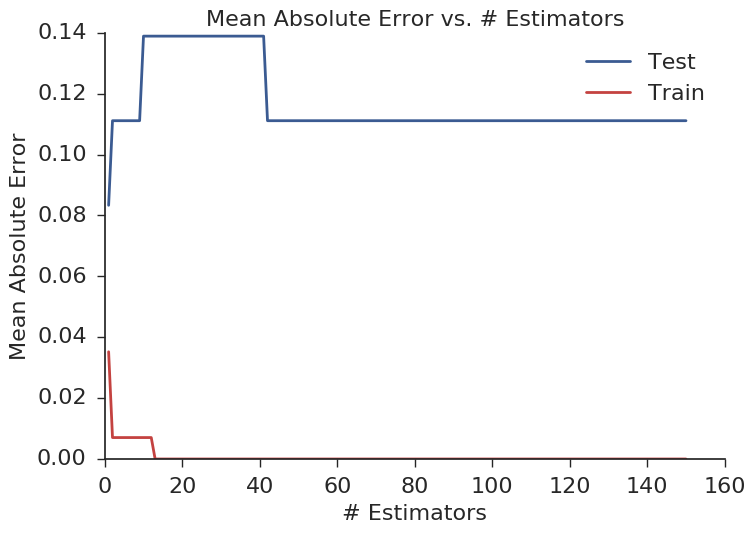

In [131]:
ax = plot_mean_abs_error(X_train, X_test, y_train, y_test, 150, check_random_state(0), t_best_max_depth)

In [132]:
assert_is_instance(ax, mpl.axes.Axes, msg="Your function should return a matplotlib.axes.Axes object.")

assert_equal(len(ax.lines), 2)

assert_is_not(len(ax.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is_not(ax.xaxis.get_label_text(), '', msg="Change the x-axis label to something more descriptive.")
assert_is_not(ax.yaxis.get_label_text(), '', msg="Change the y-axis label to something more descriptive.")

handles, labels = ax.get_legend_handles_labels()
assert_equal(set(labels), set(['Train', 'Test']), msg="Make sure you have correct line labels.")

lines = ax.get_lines()
train = [l for l in lines if l.get_label()=='Train'][0]
test = [l for l in lines if l.get_label()=='Test'][0]

train_xdata = train.get_xdata()
train_ydata = train.get_ydata()

test_xdata = test.get_xdata()
test_ydata = test.get_ydata()

assert_array_almost_equal(train_xdata[:5], [1, 2, 3, 4, 5])
assert_array_almost_equal(train_ydata[:5], [0.03521127,  0.00704225,  0.00704225,  0.00704225,  0.00704225])

assert_array_almost_equal(test_xdata[:5], [1, 2, 3, 4, 5])
assert_array_almost_equal(test_ydata[:5], [0.08333333,  0.11111111,  0.11111111,  0.11111111,  0.11111111])